In [1]:
# MULTIPLE LINEAR REGRESSION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

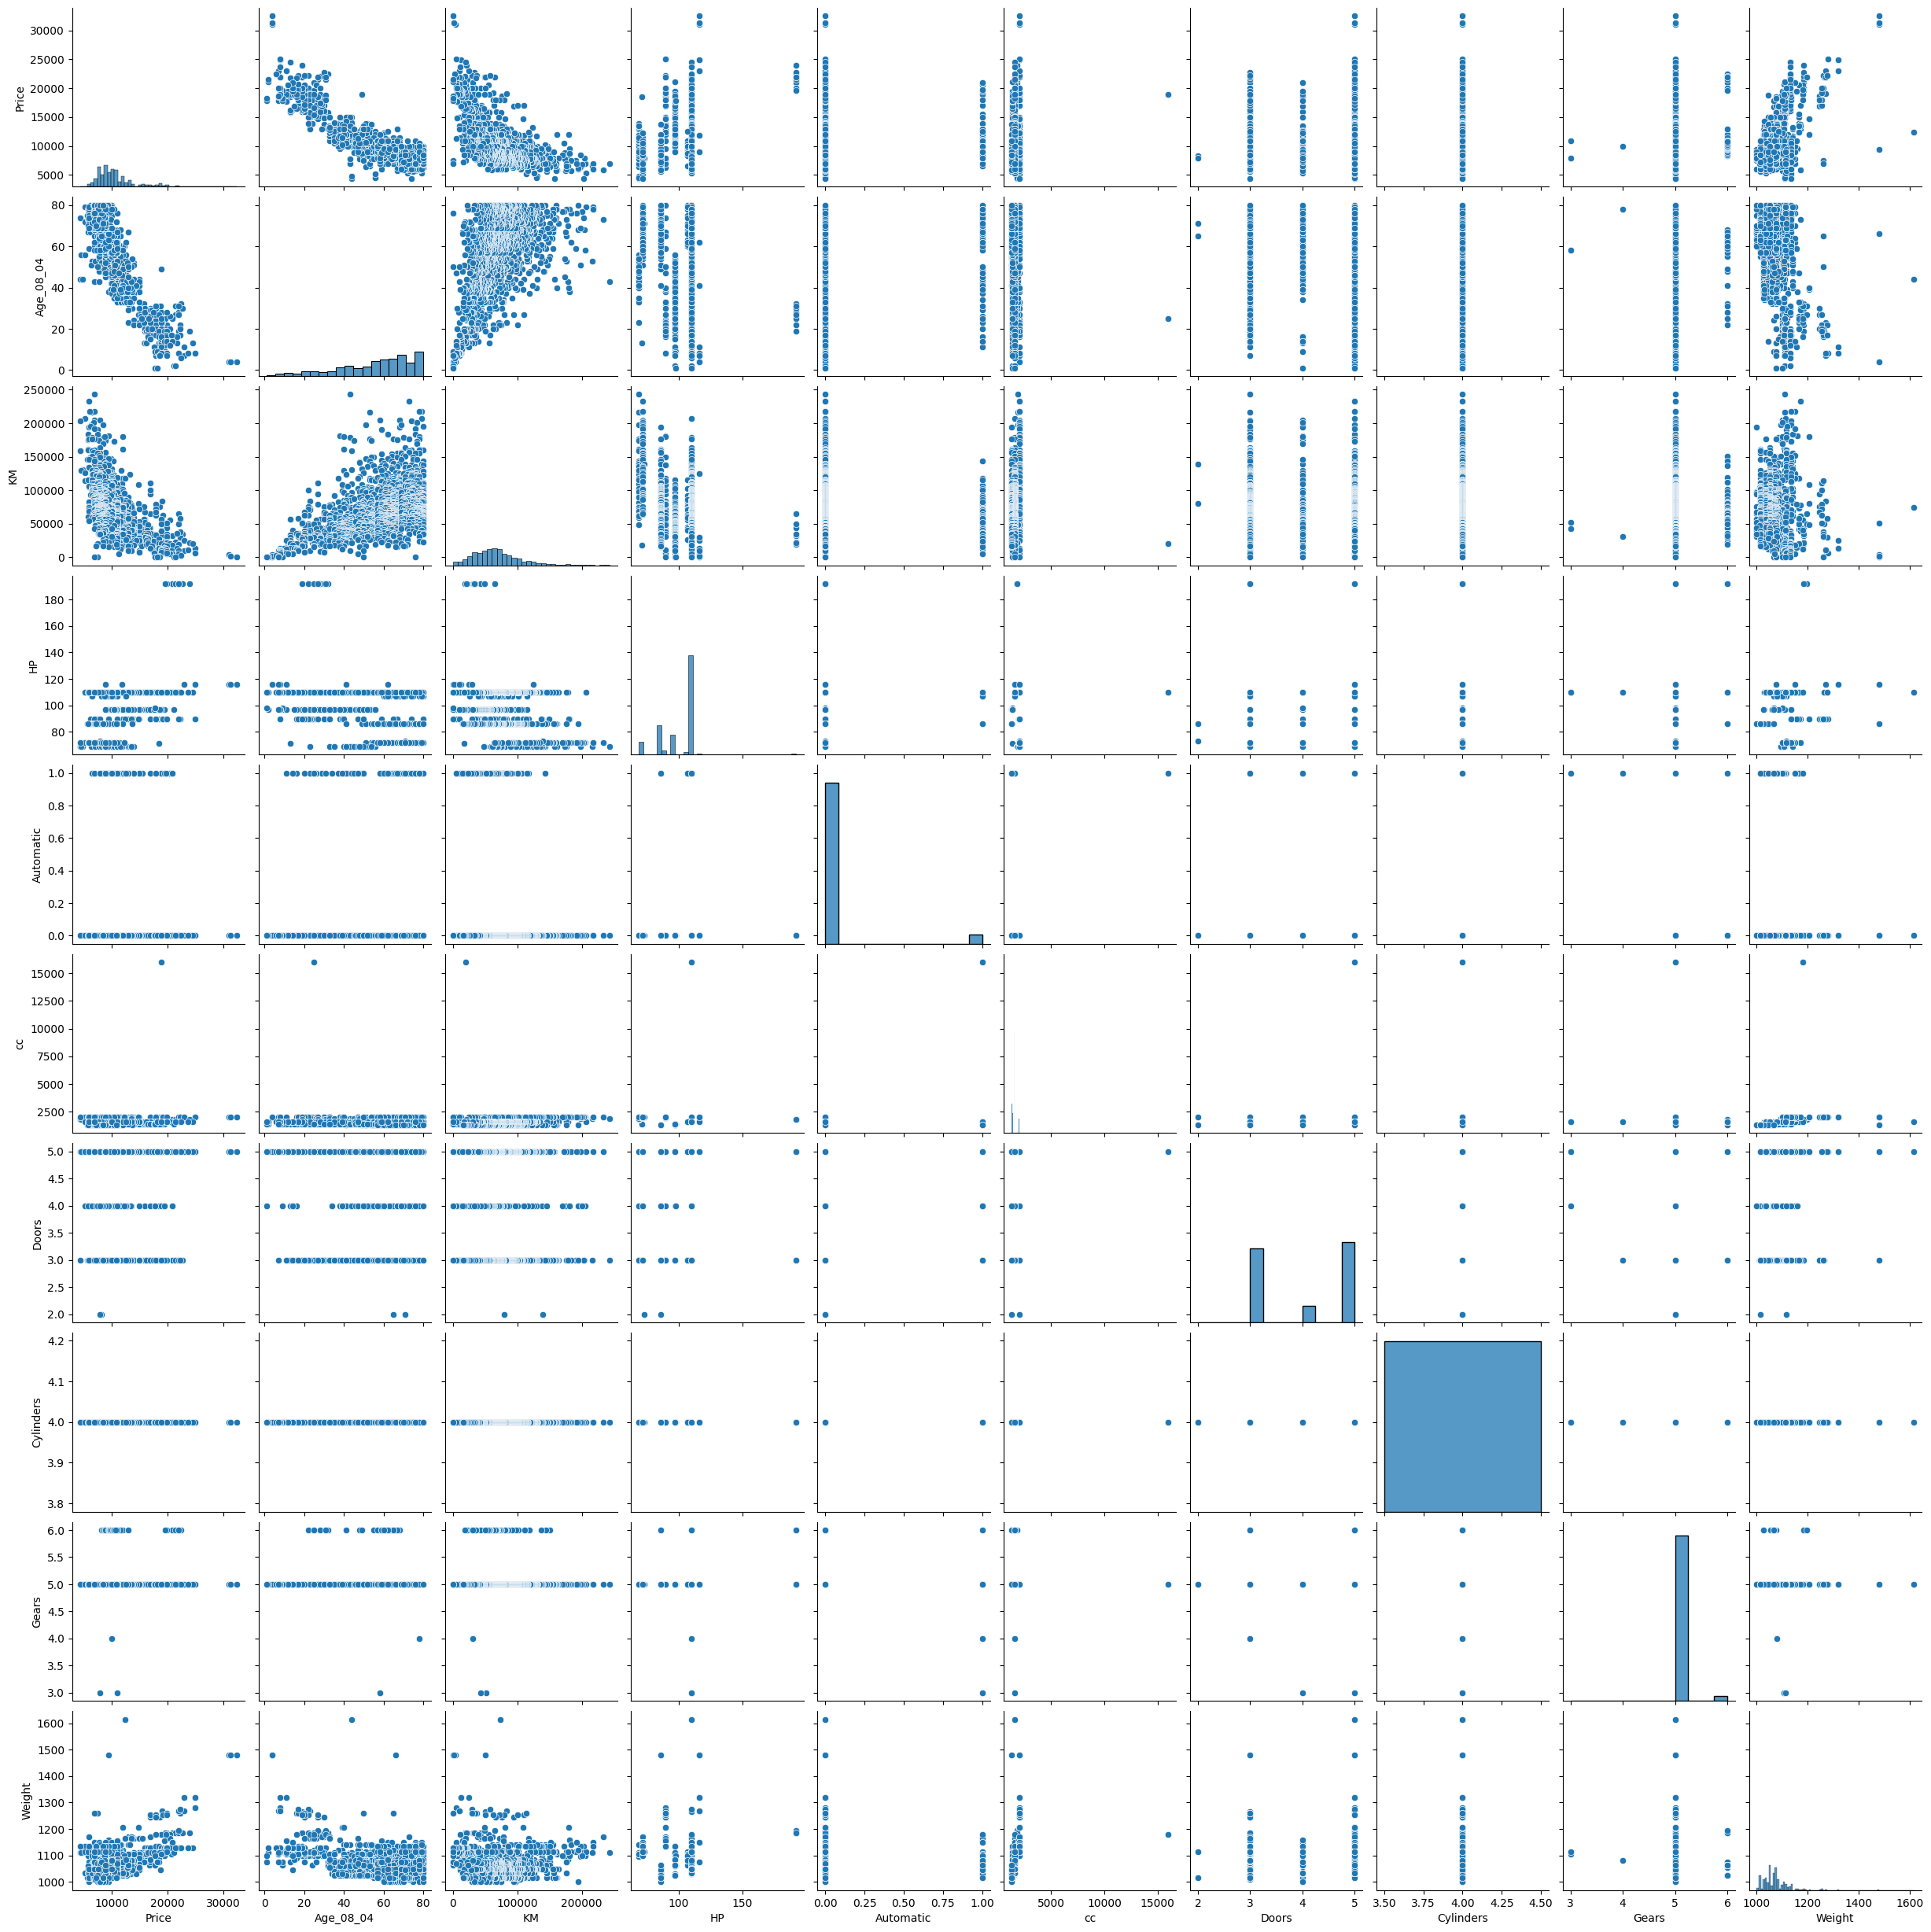

In [6]:
# Pairplot for all the numeric variables
sns.pairplot(df)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


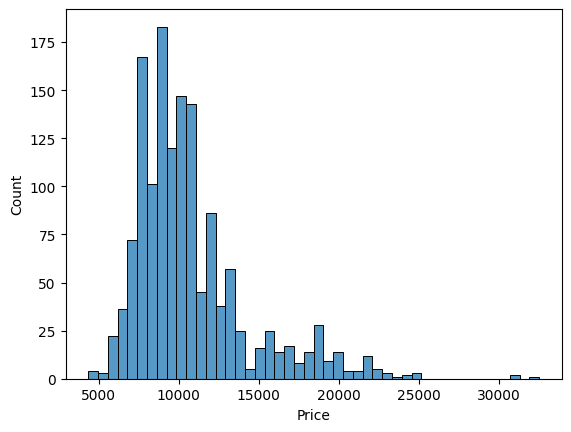

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


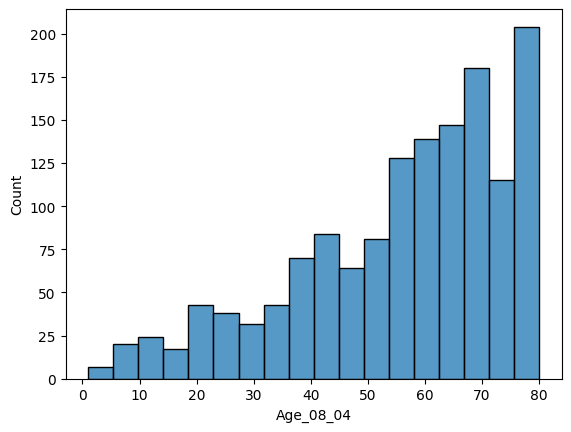

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


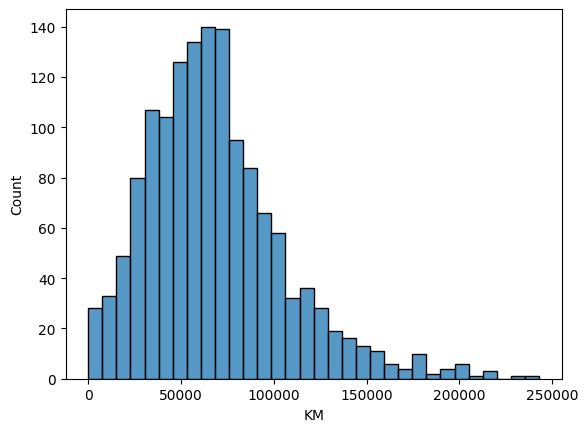

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


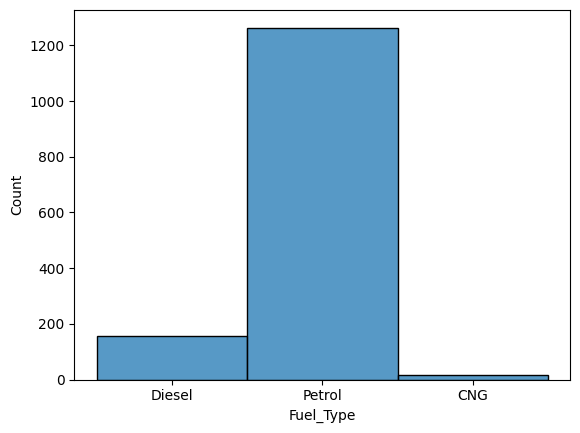

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


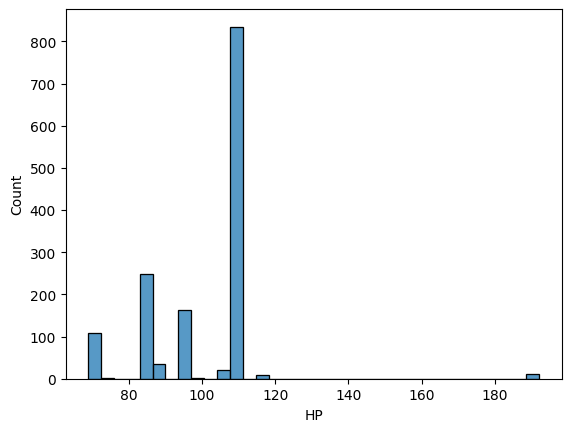

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


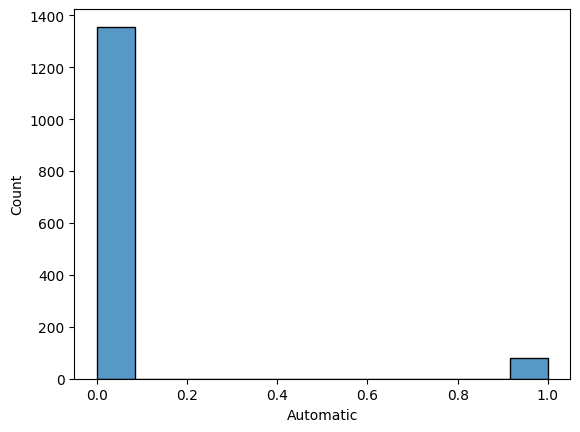

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


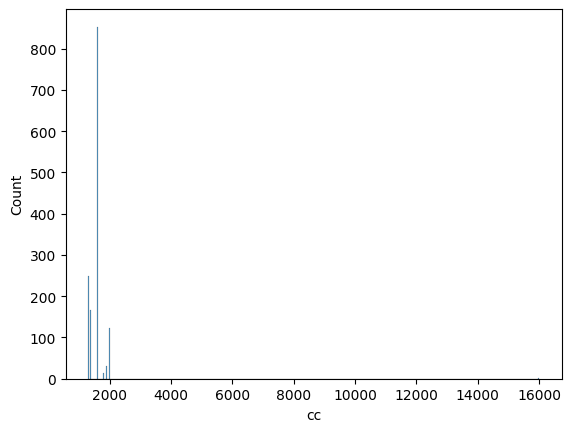

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


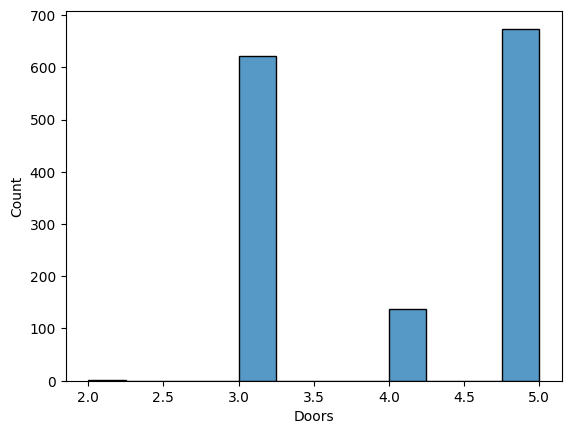

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


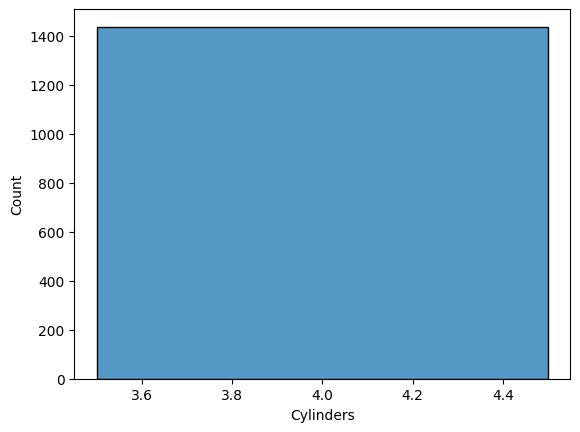

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


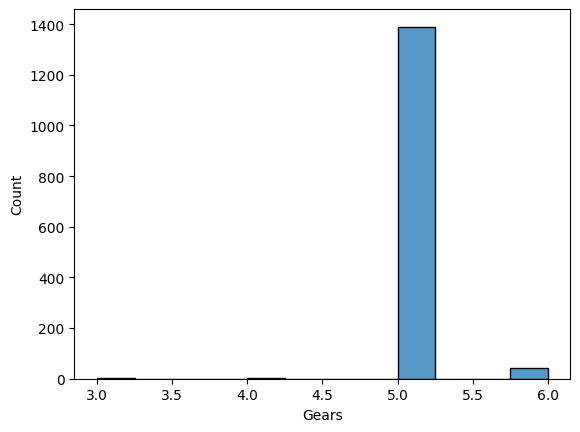

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


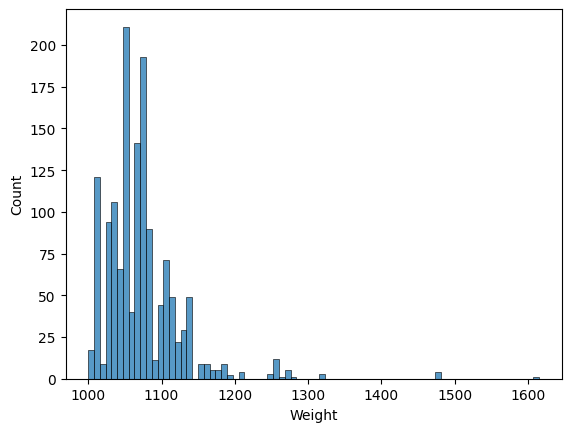

In [13]:
# Histograms for each variable
for column in df.columns:
    sns.histplot(df[column])
    plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


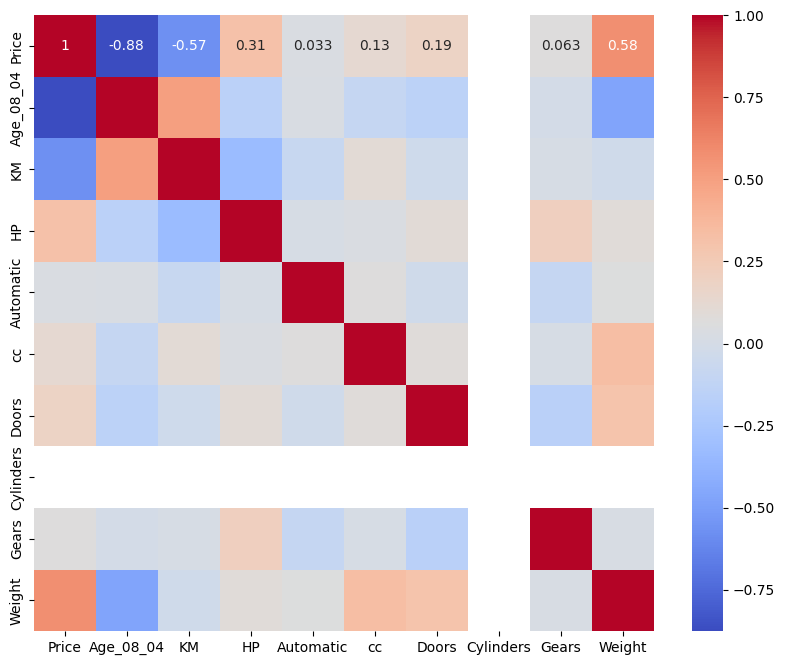

In [10]:
numeric_data = df.select_dtypes(include=[np.number])

# Plotting the correlation matrix for only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
X = df.drop('Price', axis=1) 
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Price', axis=1)
y = df['Price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# MODEL 1 : Using all features

In [19]:
from sklearn.linear_model import LinearRegression

# Create a model instance
model1 = LinearRegression()

# Train the model
model1.fit(X_train, y_train)

# Print the coefficients of the model
print("Intercept: ", model1.intercept_)
print("Coefficients: ", pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient']))

# Make predictions
predictions1 = model1.predict(X_test)

Intercept:  -14255.385993565258
Coefficients:                     Coefficient
Age_08_04        -1.208305e+02
KM               -1.623141e-02
HP                1.403948e+01
Automatic         1.488309e+02
cc               -3.037219e-02
Doors            -6.031097e+01
Cylinders         1.250555e-12
Gears             5.516007e+02
Weight            2.588496e+01
Fuel_Type_Diesel -6.854876e+01
Fuel_Type_Petrol  1.370809e+03


In [20]:
#MODEL 2: Using a subset of features

In [24]:
# Select a subset of features
X_train2 = X_train[['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']]
X_test2 = X_test[['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']]

# Create a model instance
model2 = LinearRegression()

# Train the model
model2.fit(X_train2, y_train)

# Print the coefficients of the model
print("Intercept: ", model2.intercept_)
print("Coefficients: ", pd.DataFrame(model2.coef_, X_train2.columns, columns=['Coefficient']))

# Make predictions
predictions2 = model2.predict(X_test2)

Intercept:  -5345.981549181684
Coefficients:             Coefficient
Age_08_04  -120.716275
KM           -0.019742
HP           29.411494
Automatic   308.482427
cc           -0.113118
Doors       -19.308582
Weight       20.000876


In [25]:
#MODEL 3: Using another subset of features

In [23]:
# Select a subset of features
X_train3 = X_train[['Age_08_04', 'KM', 'Weight']]
X_test3 = X_test[['Age_08_04', 'KM', 'Weight']]

# Create a model instance
model3 = LinearRegression()

# Train the model
model3.fit(X_train3, y_train)

# Print the coefficients of the model
print("Intercept: ", model3.intercept_)
print("Coefficients: ", pd.DataFrame(model3.coef_, X_train3.columns, columns=['Coefficient']))

# Make predictions
predictions3 = model3.predict(X_test3)

Intercept:  -3119.357244040537
Coefficients:             Coefficient
Age_08_04  -117.963603
KM           -0.024617
Weight       20.647584


In [26]:
#Evaluation

In [ ]:
#Model 1 :

In [27]:
# Calculate and print values of MAE, MSE, RMSE, and R-Squared
mae1 = metrics.mean_absolute_error(y_test, predictions1)
mse1 = metrics.mean_squared_error(y_test, predictions1)
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, predictions1))
r2_1 = metrics.r2_score(y_test, predictions1)

print("Model 1 Performance:")
print("--------------------")
print('Mean Absolute Error:', mae1)
print('Mean Squared Error:', mse1)
print('Root Mean Squared Error:', rmse1)
print('R-Squared:', r2_1)

Model 1 Performance:
--------------------
Mean Absolute Error: 990.8872739193923
Mean Squared Error: 2203043.8231437006
Root Mean Squared Error: 1484.2654153296508
R-Squared: 0.8348888040611084


In [29]:
#Model 2 :

In [28]:
mae2 = metrics.mean_absolute_error(y_test, predictions2)
mse2 = metrics.mean_squared_error(y_test, predictions2)
rmse2 = np.sqrt(metrics.mean_squared_error(y_test, predictions2))
r2_2 = metrics.r2_score(y_test, predictions2)

print("\nModel 2 Performance:")
print("--------------------")
print('Mean Absolute Error:', mae2)
print('Mean Squared Error:', mse2)
print('Root Mean Squared Error:', rmse2)
print('R-Squared:', r2_2)


Model 2 Performance:
--------------------
Mean Absolute Error: 997.0488002262779
Mean Squared Error: 1986155.8741177486
Root Mean Squared Error: 1409.3104250369215
R-Squared: 0.8511438727402721


In [30]:
# Model 3 :

In [31]:
mae3 = metrics.mean_absolute_error(y_test, predictions3)
mse3 = metrics.mean_squared_error(y_test, predictions3)
rmse3 = np.sqrt(metrics.mean_squared_error(y_test, predictions3))
r2_3 = metrics.r2_score(y_test, predictions3)

print("\nModel 3 Performance:")
print("--------------------")
print('Mean Absolute Error:', mae3)
print('Mean Squared Error:', mse3)
print('Root Mean Squared Error:', rmse3)
print('R-Squared:', r2_3)


Model 3 Performance:
--------------------
Mean Absolute Error: 1020.5916300198203
Mean Squared Error: 2234953.06172593
Root Mean Squared Error: 1494.9759401829615
R-Squared: 0.8324973071292439


In [32]:
#Observation

 * Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It measures the average magnitude of the errors in a set of predictions, without considering their direction.
 * Mean Squared Error (MSE) is the mean of the squared errors. It measures the average squared difference between the estimated values and the actual value.
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors. It measures the standard deviation of the residuals.
 * R-squared (R²) is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model.

In [33]:
#Lasso Regression

In [34]:
from sklearn.linear_model import Lasso

# Create a Lasso model instance
lasso = Lasso(alpha=0.1) # You can adjust the alpha parameter to control the amount of regularization

# Train the model
lasso.fit(X_train, y_train)

# Make predictions
lasso_predictions = lasso.predict(X_test)

# Evaluate the model
print('Lasso Regression Performance:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lasso_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso_predictions)))
print('R-Squared:', metrics.r2_score(y_test, lasso_predictions))

Lasso Regression Performance:
Mean Absolute Error: 990.8940127223727
Mean Squared Error: 2202270.2600246817
Root Mean Squared Error: 1484.0048045827486
R-Squared: 0.8349467801805


In [35]:
#Ridge Regression

In [36]:
from sklearn.linear_model import Ridge

# Create a Ridge model instance
ridge = Ridge(alpha=0.1) # You can adjust the alpha parameter to control the amount of regularization

# Train the model
ridge.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge.predict(X_test)

# Evaluate the model
print('\nRidge Regression Performance:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_predictions)))
print('R-Squared:', metrics.r2_score(y_test, ridge_predictions))


Ridge Regression Performance:
Mean Absolute Error: 990.870125029498
Mean Squared Error: 2202732.2441678904
Root Mean Squared Error: 1484.1604509512745
R-Squared: 0.8349121559240105
